In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import sys


In [45]:
json_annot = "1013_ablation_n1_e1234_P11_2_2_testing_edges_result.json"
# the file have this format: [[u, v, label], [u, v, label], ...]
# where u and v are the nodes and label is the edge type
# Read the json file
pred = pd.read_json(json_annot)
pred

0     1  2
0      67  1231  1
1      61  1264  1
2    1423   115  1
3    1434   348  1
4    1191    76  1
..    ...   ... ..
168   910  1444  1
169     9  1394  1
170  1417  1526  1
171  1392    10  1
172   100   914  1

[173 rows x 3 columns]

In [42]:
tile = 'P11_2_2'
task = 'Test/'
edges = 'Datasets/'+ task + tile + '_delaunay_orig_forGraphSAGE_edges.csv'
nodes = 'Datasets/'+ task + tile + '_delaunay_orig_forGraphSAGE_nodes.csv'
image_path = '../../IntelliGraph/slides/' + tile + '.tif' 

def read_data(nodes, edges):
    with open(edges, 'r') as f:
        first_line = f.readline()
        edges_cols = first_line.split(',')
        edges_cols = [col.strip() for col in edges_cols]
        edges_cols = [col.strip('"') for col in edges_cols]
    
    # read the first line of edges file to get columns names
    with open(nodes, 'r') as f:
        first_line = f.readline()
        nodes_cols = first_line.split(',')
        nodes_cols = [col.strip() for col in nodes_cols]
        nodes_cols = [col.strip('"') for col in nodes_cols]
    print(edges_cols)
    print(nodes_cols)
    edges_df = pd.read_csv(edges, header=None, names=edges_cols)[1:]
    nodes_df = pd.read_csv(nodes, header=None, names=nodes_cols)[1:]

    return nodes_df, edges_df

nodes_df, edges_df = read_data(nodes, edges)

nodes_df.head()


['source', 'target', 'type', 'distance', 'Delta_Entropy', 'Sorenson_Similarity']
['id', 'lym', 'epi', 'fib', 'inf', 'x', 'y', 'gt', 'Cell_density', 'Node_Entropy']


id  lym  epi  fib  inf    x    y          gt        Cell_density  \
1  0  0.0  1.0  0.0  0.0  519    5  epithelial  114.17228608618935   
2  1  0.0  1.0  0.0  0.0  570   38  epithelial   52.37863966140374   
3  2  0.0  1.0  0.0  0.0  514   63  epithelial   73.62750440744564   
4  3  0.0  1.0  0.0  0.0  548   74  epithelial   69.30880634087107   
5  4  0.0  1.0  0.0  0.0  596  218  epithelial   78.64794292008244   

          Node_Entropy  
1   0.6365141682948128  
2  0.45056120886630463  
3   0.6365141682948128  
4   0.6931471805599453  
5   0.6365141682948128

In [46]:
edges_df.type = 0
edges_df

source target  type            distance        Delta_Entropy  \
1         1      0     0   60.74537019394976  0.18595295942850815   
2         2      0     0  58.215118311311535                  0.0   
3         2      1     0  61.326992425847855  0.18595295942850815   
4         3      1     0  42.190046219457976  0.24258597169364066   
5         3      2     0   35.73513677041127  0.05663301226513251   
...     ...    ...   ...                 ...                  ...   
4578   1538   1540     0  14.560219778561036                  0.0   
4579    952   1540     0   18.24828759089466                  0.0   
4580   1540    288     0  27.294688127912362  0.34883209584303193   
4581   1539   1540     0   9.899494936611665                  0.0   
4582   1540    373     0   20.12461179749811                  0.0   

      Sorenson_Similarity  
1                     0.4  
2                     0.4  
3                     0.4  
4                     0.4  
5                     0.4  
...                   ...  
4578  0.35294117647058826  
4579   0.5333333333333333  
4580   0.2222222222222222  
4581                  0.4  
4582                0.375  

[4582 rows x 6 columns]

In [53]:
edges_df.loc[(edges_df.source == "1540") ] 

source target  type            distance        Delta_Entropy  \
4580   1540    288     0  27.294688127912362  0.34883209584303193   
4582   1540    373     0   20.12461179749811                  0.0   

     Sorenson_Similarity  
4580  0.2222222222222222  
4582               0.375

In [54]:
for index, row in pred.iterrows():
    edges_df.loc[(edges_df.source == row[0]) & (edges_df.target == row[1]), 'type'] = 1
    edges_df.loc[(edges_df.source == row[1]) & (edges_df.target == row[0]), 'type'] = 1

In [55]:
edges_df.type.value_counts()

0    4409
1     173
Name: type, dtype: int64

In [56]:
#tile = 'P7_HE_Default_Extended_3_2'
#task = 'Test/'
#edges = 'Datasets/'+ task + tile + '_delaunay_orig_forGraphSAGE_edges.csv'
#nodes = 'Datasets/'+ task + tile + '_delaunay_orig_forGraphSAGE_nodes.csv'
#image_path = '../../IntelliGraph/slides/' + tile + '.tif' 

#edges_df = pd.read_csv(edges, header=None, names=['source', 'target','type','distance','Delta_Entropy','Sorenson_Similarity'])[1:]
#nodes_df = pd.read_csv(nodes, header=None, names=['id','lym','epi','fib','inf','x','y','gt','Cell_density','Node_Entropy'])[1:]

edges_df['source'] = edges_df['source'].astype(int)
edges_df['target'] = edges_df['target'].astype(int)
edges_df['type'] = edges_df['type'].astype(int)
edges_df['distance'] = edges_df['distance'].astype(float)

nodes_df['id'] = nodes_df['id'].astype(int)
nodes_df['lym'] = nodes_df['lym'].astype(float)
nodes_df['epi'] = nodes_df['epi'].astype(float)
nodes_df['fib'] = nodes_df['fib'].astype(float)
nodes_df['inf'] = nodes_df['inf'].astype(float)
nodes_df['x'] = nodes_df['x'].astype(float)
nodes_df['y'] = nodes_df['y'].astype(float)

print(edges_df.head())
print(nodes_df.head())

   source  target  type   distance        Delta_Entropy Sorenson_Similarity
1       1       0     0  60.745370  0.18595295942850815                 0.4
2       2       0     0  58.215118                  0.0                 0.4
3       2       1     0  61.326992  0.18595295942850815                 0.4
4       3       1     0  42.190046  0.24258597169364066                 0.4
5       3       2     0  35.735137  0.05663301226513251                 0.4
   id  lym  epi  fib  inf      x      y          gt        Cell_density  \
1   0  0.0  1.0  0.0  0.0  519.0    5.0  epithelial  114.17228608618935   
2   1  0.0  1.0  0.0  0.0  570.0   38.0  epithelial   52.37863966140374   
3   2  0.0  1.0  0.0  0.0  514.0   63.0  epithelial   73.62750440744564   
4   3  0.0  1.0  0.0  0.0  548.0   74.0  epithelial   69.30880634087107   
5   4  0.0  1.0  0.0  0.0  596.0  218.0  epithelial   78.64794292008244   

          Node_Entropy  
1   0.6365141682948128  
2  0.45056120886630463  
3   0.636514168294

In [57]:
# visualize graph
import networkx as nx
G = nx.Graph()
#G.add_nodes_from(nodes,)
for index, row in nodes_df.iterrows():
    G.add_node(row['id'], type=row['gt'], coords=(row['x'], row['y']))


#G.add_edges_from(edges_df[['source', 'target']].values, )

for u,v,d in edges_df[['source', 'target', 'type']].values:
    G.add_edge(u, v, label=d)

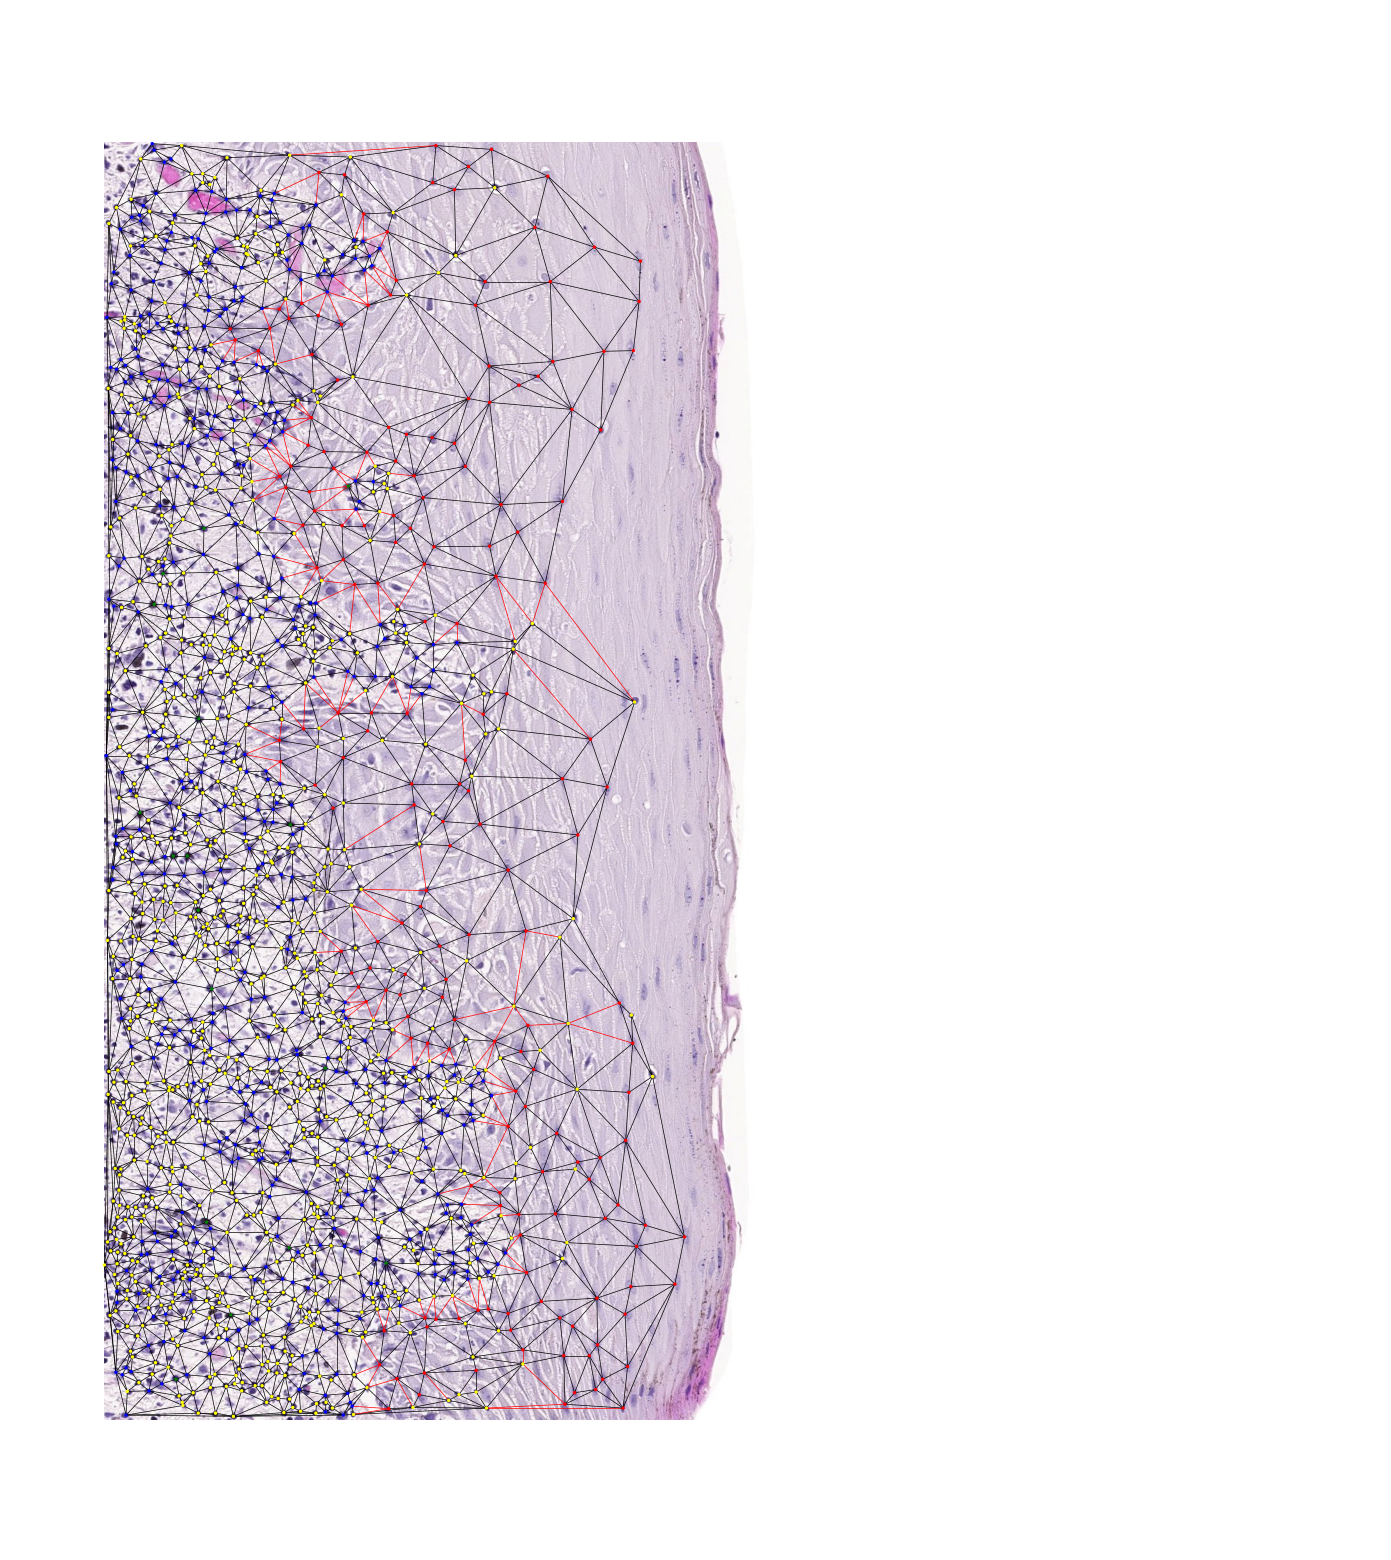

In [58]:
# Load and preprocess the image

image = plt.imread(image_path)
image = image[:, :, 0:3]

# Create a figure and axis object
fig, ax = plt.subplots()

# Figure size 20,20
fig.set_size_inches(20, 20)


# Plot the image
ax.imshow(image)

pos = nodes_df[['x', 'y']].values

gt = nodes_df['gt'].values
color = {'epithelial': 'red', 'fibroblast and endothelial': 'blue', 'inflammatory': 'green', 'lymphocyte': 'yellow', 'apoptosis / civiatte body': 'black'}
edge_color = {0:'black', 1: 'red'}#
edge_types = edges_df['type'].values
edge_colors = [edge_color[int(label)] for u, v, label in G.edges.data('label')]

nx.draw(G, pos, node_size=2, width= 0.5, node_color=[color[gt[i]] for i in range(len(gt))], edge_color=edge_colors )

# [1.5 if int(edge_types[i]) else 0.5 for i in range(len(edge_types)) ]
# [edge_color[int(edge_types[i])] for i in range(len(edge_types))]

# Plot the graph on top of the image
#nx.draw_networkx(G, pos, with_labels=False, node_size=1, edge_color='red', node_color='red', ax=ax)

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.show()

In [59]:
import pandas as pd
import networkx as nx
from itertools import combinations
 
# Find all triangles
triangles = []
count_crossing_Edges = dict()
for node in G.nodes:
    neighbors = list(G.neighbors(node))
    for u, v in combinations(neighbors, 2):
        if G.has_edge(u, v):
            triangles.append(sorted([node, u, v]))
            tmp = frozenset((node,u,v))
            count = 0
            
            if edges_df[(edges_df['source'] == u) & (edges_df['target'] == v) | 
                    (edges_df['source'] == v) & (edges_df['target'] == u)]['type'].values[0] == 1:
                count +=1
            if edges_df[(edges_df['source'] == u) & (edges_df['target'] == node) |
                        (edges_df['source'] == node) & (edges_df['target'] == u)]['type'].values[0] == 1:
                count +=1    
            if edges_df[(edges_df['source'] == v) & (edges_df['target'] == node) |
                        (edges_df['source'] == node) & (edges_df['target'] == v)]['type'].values[0] == 1:
                count +=1
            count_crossing_Edges[tmp] = count

# Remove duplicate triangles
unique_triangles = [list(x) for x in set(tuple(x) for x in triangles)]

# Create a pandas DataFrame
triangle_df = pd.DataFrame(unique_triangles, columns=['Node1', 'Node2', 'Node3'])
print(triangle_df)

      Node1  Node2  Node3
0       384    449    450
1       210    491    991
2       606   1196   1199
3       279    488    828
4       210    490    846
...     ...    ...    ...
3046    941   1363   1365
3047    336    337   1512
3048    697    698   1379
3049    212    214    534
3050    503    916   1531

[3051 rows x 3 columns]


In [60]:
for idx, row in triangle_df.iterrows():
    node1_xy = nodes_df.loc[nodes_df['id'] == row['Node1'], ['x','y']].iloc[0].values
    node2_xy = nodes_df.loc[nodes_df['id'] == row['Node2'], ['x','y']].iloc[0].values
    node3_xy = nodes_df.loc[nodes_df['id'] == row['Node3'], ['x','y']].iloc[0].values

    node1_gt = nodes_df.loc[nodes_df['id'] == row['Node1'], ['gt']].iloc[0].values
    node2_gt = nodes_df.loc[nodes_df['id'] == row['Node2'], ['gt']].iloc[0].values
    node3_gt = nodes_df.loc[nodes_df['id'] == row['Node3'], ['gt']].iloc[0].values
 

    triangle_df.loc[idx, ['x1','y1']] = node1_xy
    triangle_df.loc[idx, ['x2','y2']] = node2_xy
    triangle_df.loc[idx, ['x3','y3']] = node3_xy

    triangle_df.loc[idx, ['gt1']] = node1_gt
    triangle_df.loc[idx, ['gt2']] = node2_gt
    triangle_df.loc[idx, ['gt3']] = node3_gt

    count = 0
    if edges_df[(edges_df['source'] == row['Node1']) & (edges_df['target'] == row['Node2']) | 
             (edges_df['source'] == row['Node2']) & (edges_df['target'] == row['Node1'])]['type'].values[0] == 1:
        count +=1
    if edges_df[(edges_df['source'] == row['Node1']) & (edges_df['target'] == row['Node3']) |
                (edges_df['source'] == row['Node3']) & (edges_df['target'] == row['Node1'])]['type'].values[0] == 1:
        count +=1    
    if edges_df[(edges_df['source'] == row['Node2']) & (edges_df['target'] == row['Node3']) |
                (edges_df['source'] == row['Node3']) & (edges_df['target'] == row['Node2'])]['type'].values[0] == 1:
        count +=1
    
    

        
    
    triangle_df.loc[idx, ['count']] = count

triangle_df

Node1  Node2  Node3     x1      y1     x2      y2     x3      y3  \
0       384    449    450  271.0  1911.0  270.0  1926.0  257.0  1923.0   
1       210    491    991  315.0  1347.0  340.0  1335.0  334.0  1348.0   
2       606   1196   1199  577.0   834.0  515.0   826.0  552.0   783.0   
3       279    488    828  240.0  1401.0  227.0  1375.0  257.0  1400.0   
4       210    490    846  315.0  1347.0  310.0  1333.0  310.0  1362.0   
...     ...    ...    ...    ...     ...    ...     ...    ...     ...   
3046    941   1363   1365   31.0   291.0   47.0   284.0   32.0   278.0   
3047    336    337   1512  418.0  1523.0  409.0  1534.0  412.0  1544.0   
3048    697    698   1379  279.0   172.0  268.0   176.0  286.0   184.0   
3049    212    214    534   52.0  1368.0   67.0  1402.0   75.0  1376.0   
3050    503    916   1531  376.0  1107.0  355.0  1129.0  350.0  1106.0   

             gt1                         gt2                         gt3  \
0     lymphocyte                  lymphocyte                  lymphocyte   
1     lymphocyte                  lymphocyte                  lymphocyte   
2     lymphocyte  fibroblast and endothelial  fibroblast and endothelial   
3     lymphocyte                  lymphocyte  fibroblast and endothelial   
4     lymphocyte                  lymphocyte  fibroblast and endothelial   
...          ...                         ...                         ...   
3046  lymphocyte                  lymphocyte                  lymphocyte   
3047  lymphocyte                  lymphocyte                  lymphocyte   
3048  lymphocyte                  lymphocyte  fibroblast and endothelial   
3049  lymphocyte                  lymphocyte                  lymphocyte   
3050  lymphocyte                  lymphocyte                  lymphocyte   

      count  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
3046    0.0  
3047    0.0  
3048    0.0  
3049    0.0  
3050    0.0  

[3051 rows x 13 columns]

In [18]:
triangle_df[triangle_df['count'] == 4]

Node1  Node2  Node3     x1      y1     x2      y2     x3      y3  \
62      365    802    966  261.0  1718.0  271.0  1712.0  289.0  1730.0   
63      273   1156   1163  105.0  1089.0  108.0  1117.0   95.0  1118.0   
149      73    603   1199  552.0   753.0  643.0   781.0  552.0   783.0   
161      74    636   1200  502.0   750.0  459.0   731.0  470.0   756.0   
168     253   1240   1249  102.0   746.0   78.0   723.0   96.0   724.0   
217     637   1239   1244  124.0   674.0   92.0   675.0  108.0   657.0   
220     366    750    966  318.0  1726.0  303.0  1737.0  289.0  1730.0   
237     245   1240   1249   87.0   692.0   78.0   723.0   96.0   724.0   
443      66    632   1211  333.0   666.0  308.0   711.0  278.0   682.0   
479     368    742   1041  112.0  1936.0  129.0  1929.0  100.0  1917.0   
514     682   1238   1246  104.0   616.0  156.0   604.0  155.0   645.0   
559     242    563    873   23.0  1026.0   56.0  1049.0   29.0  1074.0   
705     368   1002   1041  112.0  1936.0   90.0  1943.0  100.0  1917.0   
721      66    633   1233  333.0   666.0  297.0   612.0  265.0   648.0   
764     220   1133   1135  142.0  1279.0  168.0  1325.0  111.0  1314.0   
815     174    822   1091  319.0  1463.0  302.0  1428.0  346.0  1449.0   
858     253   1240   1250  102.0   746.0   78.0   723.0   53.0   735.0   
921     320    368    742  139.0  1957.0  112.0  1936.0  129.0  1929.0   
938      74    598   1200  502.0   750.0  473.0   769.0  470.0   756.0   
1010   1429   1432   1534  411.0  1949.0  445.0  1982.0  388.0  1978.0   
1014    154    802    966  313.0  1686.0  271.0  1712.0  289.0  1730.0   
1059   1145   1147   1153  256.0  1078.0  291.0  1068.0  295.0  1083.0   
1131     74   1197   1471  502.0   750.0  515.0   786.0  518.0   740.0   
1152     61   1235   1264  284.0   540.0  266.0   589.0  233.0   560.0   
1224    552    858   1157  166.0  1101.0  156.0  1143.0  130.0  1117.0   
1299    245   1239   1251   87.0   692.0   92.0   675.0   75.0   676.0   
1362    266    627   1184  148.0   902.0  177.0   902.0  153.0   860.0   
1404     21   1315   1481  241.0   326.0  249.0   352.0  268.0   347.0   
1421    368    376   1002  112.0  1936.0  117.0  1962.0   90.0  1943.0   
1593    159   1060   1061  470.0  1729.0  441.0  1754.0  429.0  1714.0   
1598    430   1091   1098  344.0  1477.0  346.0  1449.0  363.0  1454.0   
1642    645   1240   1250   45.0   719.0   78.0   723.0   53.0   735.0   
1676    562    563    871   69.0  1061.0   56.0  1049.0  103.0  1034.0   
1701   1145   1147   1154  256.0  1078.0  291.0  1068.0  264.0  1064.0   
1706    475    755   1060  491.0  1755.0  492.0  1771.0  441.0  1754.0   
1714    396    755   1060  473.0  1797.0  492.0  1771.0  441.0  1754.0   
1758     63    633   1235  311.0   599.0  297.0   612.0  266.0   589.0   
1762    358    737    963  227.0  1833.0  227.0  1849.0  198.0  1835.0   
1773    296    750    966  295.0  1749.0  303.0  1737.0  289.0  1730.0   
1853     73   1197   1471  552.0   753.0  515.0   786.0  518.0   740.0   
2032    218    844   1133  177.0  1295.0  213.0  1311.0  168.0  1325.0   
2151     67    261   1201  392.0   692.0  384.0   769.0  432.0   755.0   
2197    394   1058   1060  438.0  1791.0  427.0  1786.0  441.0  1754.0   
2204   1146   1147   1148  315.0  1067.0  291.0  1068.0  310.0  1074.0   
2240    354   1432   1534  390.0  1991.0  445.0  1982.0  388.0  1978.0   
2318    266    575   1184  148.0   902.0  142.0   868.0  153.0   860.0   
2402    562    563    872   69.0  1061.0   56.0  1049.0   55.0  1076.0   
2403    720    749    978  166.0  1700.0  160.0  1690.0  192.0  1706.0   
2423    867   1146   1147  293.0  1037.0  315.0  1067.0  291.0  1068.0   
2481     68    636   1201  428.0   690.0  459.0   731.0  432.0   755.0   
2651    563    623    871   56.0  1049.0   50.0  1023.0  103.0  1034.0   
2806    668   1238   1253  137.0   565.0  156.0   604.0  195.0   583.0   
2859     74    598   1197  502.0   750.0  473.0   769.0  515.0   786.0   
2924    30

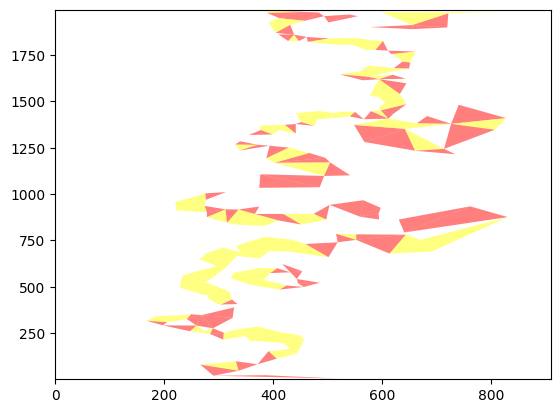

In [61]:
import matplotlib.patches as patches
# Filter triangles with count greater than 0
filtered_triangles = triangle_df[triangle_df['count'] > 0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each triangle with different colors based on count
for _, row in filtered_triangles.iterrows():
    x1, y1, x2, y2, x3, y3 = row['x1'], row['y1'], row['x2'], row['y2'], row['x3'], row['y3']
    count = row['count']
    if count == 3:
        color = 'green'
    elif count == 2:
        color = 'yellow'
    elif count == 1:
        color = 'red'
    elif count == 4:
        color = 'blue'
    triangle = patches.Polygon([(x1, y1), (x2, y2), (x3, y3)], closed=True, facecolor=color, alpha=0.5)
    ax.add_patch(triangle)

# Set the limits of the plot
x_min, x_max = triangle_df[['x1', 'x2', 'x3']].min().min() - 1, triangle_df[['x1', 'x2', 'x3']].max().max() + 1
y_min, y_max = triangle_df[['y1', 'y2', 'y3']].min().min() - 1, triangle_df[['y1', 'y2', 'y3']].max().max() + 1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Display the plot
plt.show()

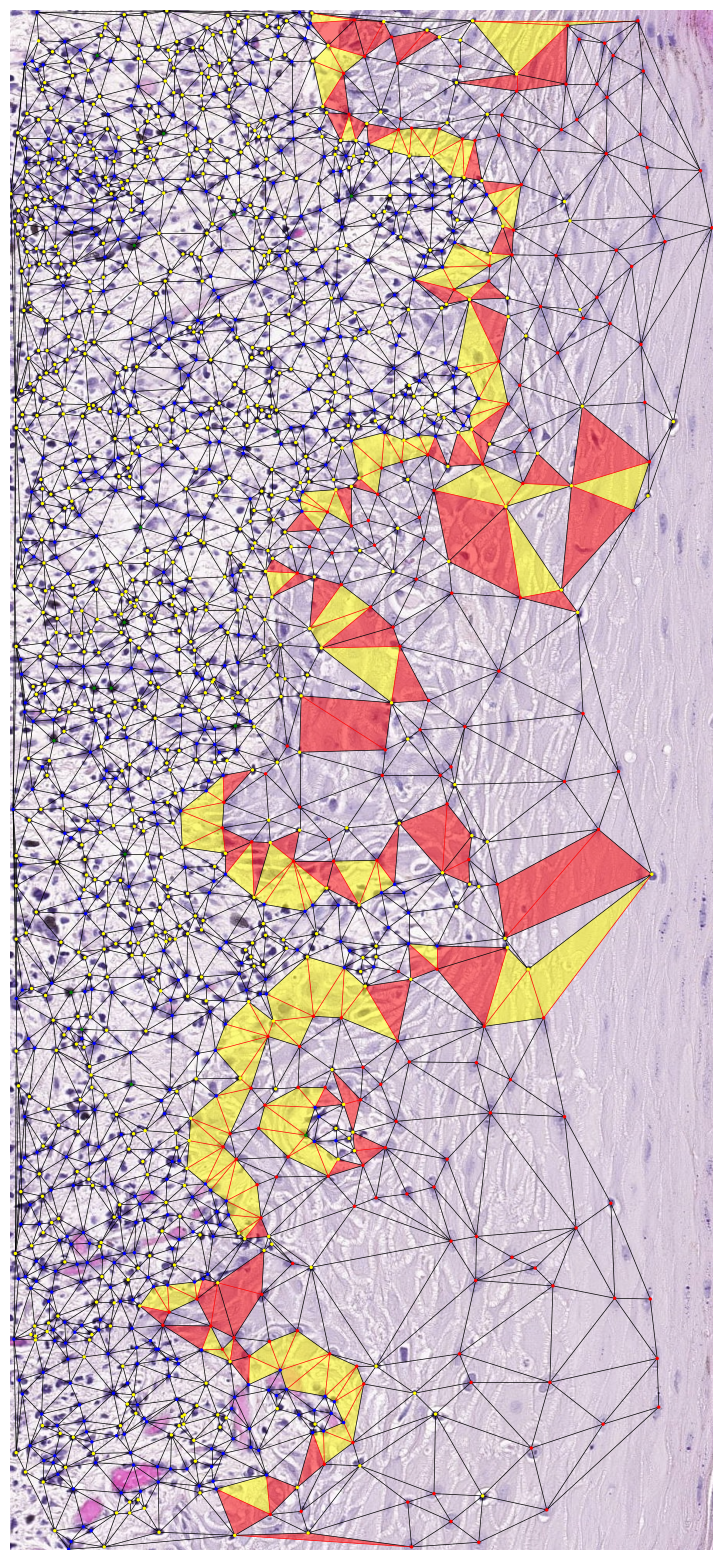

In [62]:
# Load and preprocess the image

image = plt.imread(image_path)
image = image[:, :, 0:3]

# Create a figure and axis object
fig, ax = plt.subplots()

# Figure size 20,20
fig.set_size_inches(20, 20)


# Plot the image
ax.imshow(image)


filtered_triangles = triangle_df[triangle_df['count'] > 0]

for _, row in filtered_triangles.iterrows():
    x1, y1, x2, y2, x3, y3 = row['x1'], row['y1'], row['x2'], row['y2'], row['x3'], row['y3']
    count = row['count']
    if count == 3:
        color = 'green'
    elif count == 2:
        color = 'yellow'
    elif count == 1:
        color = 'red'
    elif count == 4:
        color = 'blue'
    triangle = patches.Polygon([(x1, y1), (x2, y2), (x3, y3)], closed=True, facecolor=color, alpha=0.5)
    ax.add_patch(triangle)

# Set the limits of the plot
x_min, x_max = triangle_df[['x1', 'x2', 'x3']].min().min() - 1, triangle_df[['x1', 'x2', 'x3']].max().max() + 1
y_min, y_max = triangle_df[['y1', 'y2', 'y3']].min().min() - 1, triangle_df[['y1', 'y2', 'y3']].max().max() + 1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)




pos = nodes_df[['x', 'y']].values

gt = nodes_df['gt'].values
color = {'epithelial': 'red', 'fibroblast and endothelial': 'blue', 'inflammatory': 'green', 'lymphocyte': 'yellow', 'apoptosis / civiatte body': 'black'}
edge_color = {0:'black', 1: 'red'}#
edge_types = edges_df['type'].values
edge_colors = [edge_color[int(label)] for u, v, label in G.edges.data('label')]

nx.draw(G, pos, node_size=2, width= 0.5, node_color=[color[gt[i]] for i in range(len(gt))], edge_color=edge_colors )

# [1.5 if int(edge_types[i]) else 0.5 for i in range(len(edge_types)) ]
# [edge_color[int(edge_types[i])] for i in range(len(edge_types))]

# Plot the graph on top of the image
#nx.draw_networkx(G, pos, with_labels=False, node_size=1, edge_color='red', node_color='red', ax=ax)

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.show()

In [76]:

# Add node features to the triangle DataFrame
for idx, row in triangle_df.iterrows():
    node1_gt = nodes_df.loc[nodes_df['id'] == row['Node1'], 'gt'].iloc[0]
    node2_gt = nodes_df.loc[nodes_df['id'] == row['Node2'], 'gt'].iloc[0]
    node3_gt = nodes_df.loc[nodes_df['id'] == row['Node3'], 'gt'].iloc[0]

    triangle_df.loc[idx, 'Node1_gt'] = node1_gt
    triangle_df.loc[idx, 'Node2_gt'] = node2_gt
    triangle_df.loc[idx, 'Node3_gt'] = node3_gt
print(triangle_df)

      Node1  Node2  Node3      x1      y1      x2      y2      x3      y3  \
0       205    217    407  1560.0   652.0  1619.0   707.0  1620.0   645.0   
1       589    591    596  1924.0   432.0  1921.0   448.0  1947.0   435.0   
2       179    180    181  1473.0   375.0  1499.0   354.0  1508.0   371.0   
3       204    205    408  1608.0   597.0  1560.0   652.0  1618.0   614.0   
4       250    254    256  1653.0  1062.0  1686.0  1061.0  1661.0  1115.0   
...     ...    ...    ...     ...     ...     ...     ...     ...     ...   
1474    435    436    439  1926.0   695.0  1931.0   688.0  1949.0   691.0   
1475    613    615    625  1868.0   503.0  1848.0   475.0  1857.0   500.0   
1476     34     54    708  1690.0   122.0  1710.0   138.0  1705.0   119.0   
1477    525    526    529  1689.0   343.0  1675.0   326.0  1720.0   312.0   
1478     37     41    711  1724.0    48.0  1738.0    38.0  1726.0    66.0   

      count                    Node1_gt                    Node2_gt  \
0   

In [ ]:
from collections import defaultdict


# Find all triangles
triangles_count = defaultdict(int)
for node in G.nodes:
    neighbors = list(G.neighbors(node))
    count = 0
    for u, v in combinations(neighbors, 2):
        if G.has_edge(u, v):
            count += 1
    triangles_count[count] += 1

# Print the number of nodes having 1, 2, 3, 4, 5, ... triangles
for k, v in triangles_count.items():
    print(f"Nodes with {k} triangles: {v}")

Nodes with 4 triangles: 368
Nodes with 3 triangles: 47
Nodes with 2 triangles: 3
Nodes with 6 triangles: 1577
Nodes with 7 triangles: 932
Nodes with 5 triangles: 1308
Nodes with 9 triangles: 112
Nodes with 8 triangles: 354
Nodes with 10 triangles: 32
Nodes with 12 triangles: 2
Nodes with 11 triangles: 7
Nodes with 1 triangles: 5
Nodes with 0 triangles: 4
Nodes with 14 triangles: 1


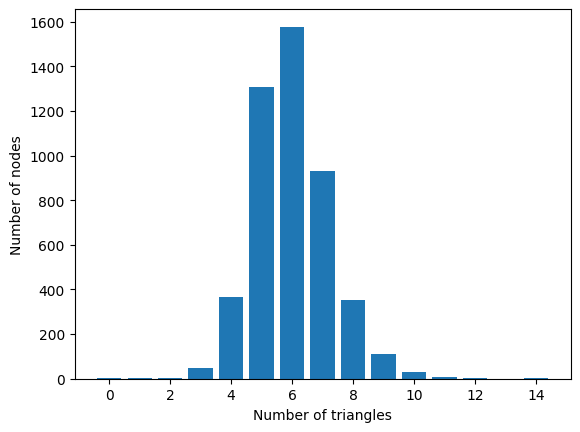

In [ ]:
# Plot the distribution of the number of triangles
plt.bar(triangles_count.keys(), triangles_count.values())
plt.xlabel("Number of triangles")
plt.ylabel("Number of nodes")
plt.show()

In [15]:

# Basic graph properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {density:.4f}")

# Degree statistics
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {d: degree_sequence.count(d) for d in degree_sequence}
avg_degree = sum(degree_sequence) / num_nodes

print("Degree distribution:")
for degree, count in degree_count.items():
    print(f"Degree {degree}: {count}")
print(f"Average degree: {avg_degree:.4f}")

# Path statistics
#avg_shortest_path_length = nx.average_shortest_path_length(G)
#diameter = nx.diameter(G)

#print(f"Average shortest path length: {avg_shortest_path_length:.4f}")
#print(f"Diameter: {diameter}")

# Clustering
"""clustering_coefficients = nx.clustering(G)
avg_clustering_coefficient = nx.average_clustering(G)

print("Clustering coefficients:")
for node, coeff in clustering_coefficients.items():
    print(f"Node {node}: {coeff:.4f}")
print(f"Average clustering coefficient: {avg_clustering_coefficient:.4f}")

# Centrality
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

print("Degree centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

print("Betweenness centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

print("Eigenvector centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality:.4f}")"""

Number of nodes: 4752
Number of edges: 14185
Density: 0.0013
Degree distribution:
Degree 12: 2
Degree 11: 7
Degree 10: 20
Degree 9: 101
Degree 8: 343
Degree 7: 958
Degree 6: 1593
Degree 5: 1307
Degree 4: 371
Degree 3: 41
Degree 2: 5
Degree 0: 4
Average degree: 5.9701
Clustering coefficients:
Node 0: 0.6667
Node 1: 0.5000
Node 2: 0.6667
Node 3: 0.6667
Node 4: 0.4000
Node 5: 0.3333
Node 6: 0.4000
Node 7: 0.3333
Node 8: 0.6667
Node 9: 0.2857
Node 10: 0.6667
Node 11: 0.2500
Node 12: 0.4000
Node 13: 0.4000
Node 14: 0.5000
Node 15: 0.3333
Node 16: 0.5000
Node 17: 0.4000
Node 18: 0.3333
Node 19: 0.5000
Node 20: 0.2857
Node 21: 0.4000
Node 22: 0.4000
Node 23: 0.5000
Node 24: 0.5000
Node 25: 0.6667
Node 26: 0.4000
Node 27: 0.2222
Node 28: 0.6667
Node 29: 0.4000
Node 30: 0.5000
Node 31: 0.5000
Node 32: 0.2857
Node 33: 0.3333
Node 34: 0.5000
Node 35: 0.4000
Node 36: 0.4000
Node 37: 0.4000
Node 38: 0.5000
Node 39: 0.3333
Node 40: 0.4000
Node 41: 0.5000
Node 42: 0.5000
Node 43: 0.3810
Node 44: 0.33

KeyboardInterrupt: 

In [20]:
def add_image_on_node(ax, xy, im, zoom=1):
    im = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im, xy, frameon=False)
    ax.add_artist(ab)

In [21]:
from PIL import Image
image = Image.open('P28_7_5.tif')

In [14]:
nodes_df[['x', 'y']].values

array([[ 335.,  323.],
       [ 297.,  352.],
       [ 335.,  468.],
       ...,
       [1660., 1828.],
       [1801., 1812.],
       [1552., 1649.]])

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image, aspect='auto', extent=[0, image.size[0], 0, image.size[1]])

# Draw the graph
#pos = {node: (data['coords'][0], data['coords'][1]) for node, data in G.nodes(data=True)}

# You can customize the appearance of the graph using additional parameters in the nx.draw function
nx.draw(G, pos, ax=ax, node_size=10, node_color='r', edge_color='black', with_labels=True, font_size=10)

# Add the image on each node
for node, data in G.nodes(data=True):
    add_image_on_node(ax, data['coords'], image, zoom=0.1)

plt.show()

MemoryError: Unable to allocate 11.4 MiB for an array with shape (2000, 2000, 3) and data type bool

In [115]:
# node degree distribution
node0 = 388
G.degree[node0]

2

In [116]:
# Get subgraph from given node
def get_subgraph(G, node, radius):
    subgraph = nx.ego_graph(G, node, radius=radius, center=True, undirected=True, distance=None)
    return subgraph

subgraph1 = get_subgraph(G, node0, 1)
subgraph2 = get_subgraph(G, node0, 2)
subgraph3 = get_subgraph(G, node0, 3)

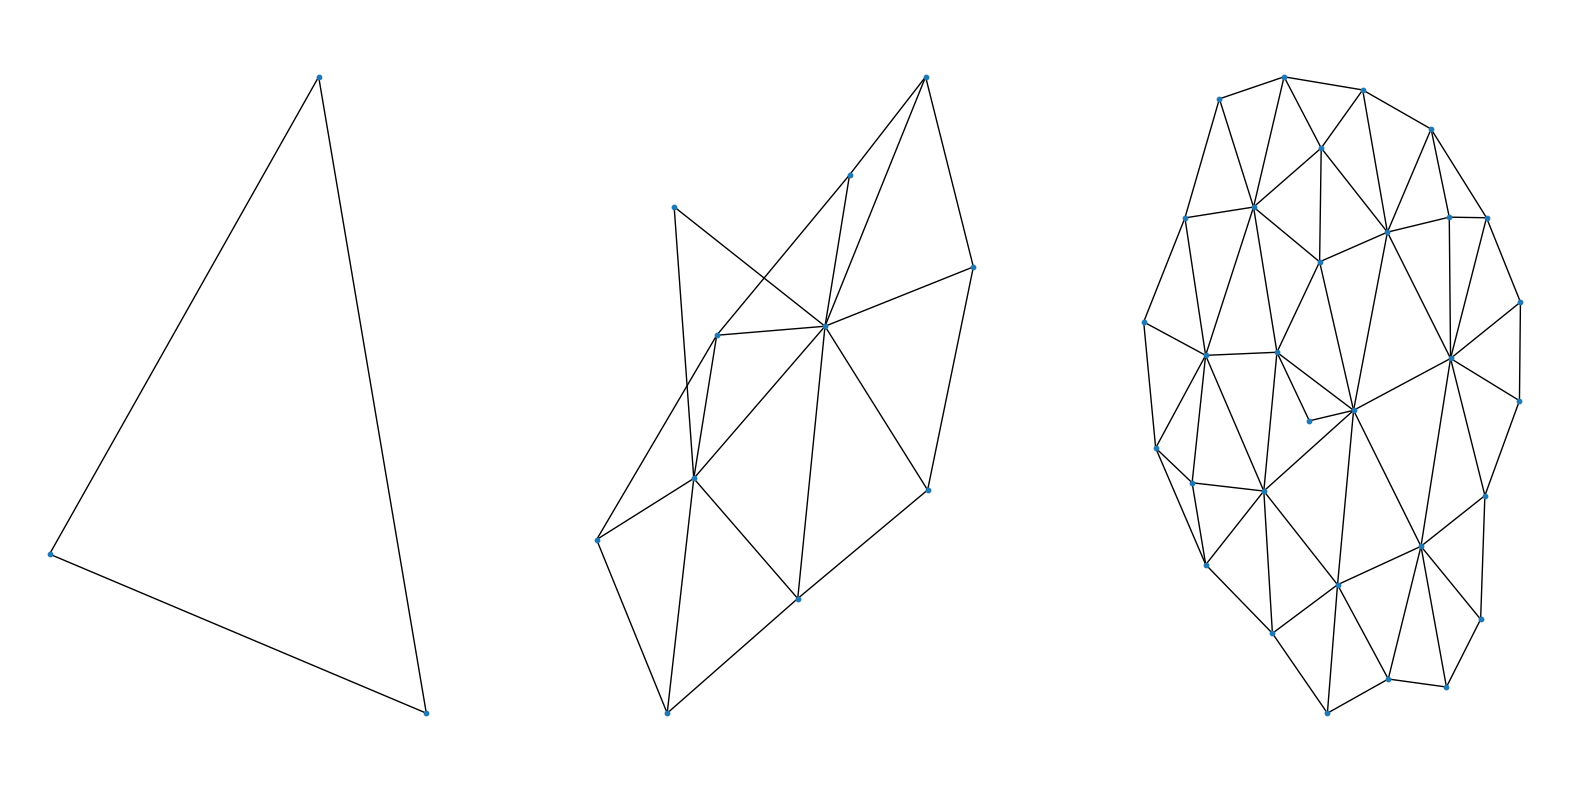

In [126]:
# Plot 3 subgraphs
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
nx.draw(subgraph1, node_size = 10)
plt.subplot(1,3,2)
nx.draw(subgraph2, node_size = 10)
plt.subplot(1,3,3)
nx.draw(subgraph3, node_size = 10)

In [8]:
nodes_degree = G.degree()

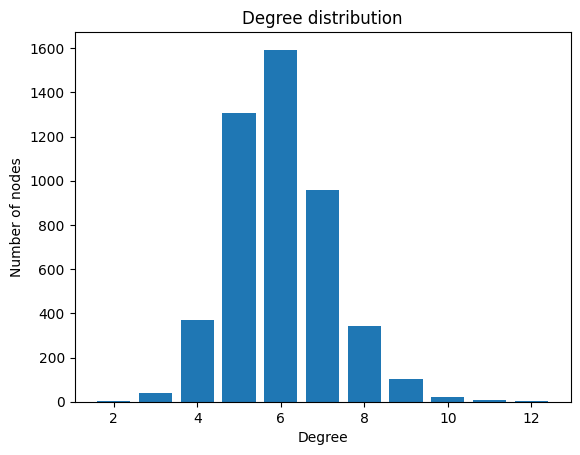

In [9]:
# Count node with same degree
degree_count = {}
for node, degree in nodes_degree:
    if degree not in degree_count:
        degree_count[degree] = 0
    degree_count[degree] += 1

# Plot degree distribution
plt.bar(degree_count.keys(), degree_count.values())
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')
plt.show()

In [10]:
# show adjacency matrix
adj = nx.adjacency_matrix(G)
adj = adj.todense()
adj

C:\Users\andre\AppData\Local\Temp\ipykernel_23784\2649149202.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G)


matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

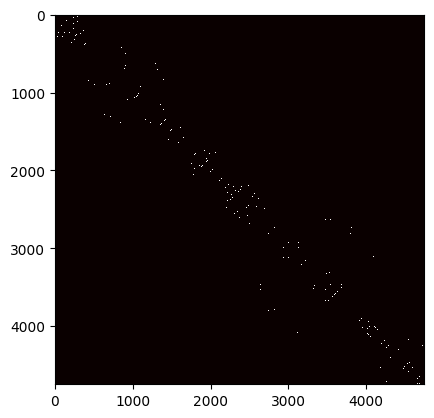

In [11]:
# plot adjacency matrix
plt.imshow(adj, cmap='hot', interpolation='nearest')
plt.show()


In [19]:
import itertools
target = nx.complete_graph(4)
for sub_nodes in itertools.combinations(G.nodes(),len(target.nodes())):
    subg = G.subgraph(sub_nodes)
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target):
        print(subg.edges())

KeyboardInterrupt: 

In [21]:
number_of_triangles = sum(nx.triangles(G).values()) / 3
number_of_triangles

9475.0

In [ ]:
# Graph G is built from the edges of the Delaunay triangulation of the points in the plane
# Create its dual graph G*

